In [112]:
# Import
import numpy as np
import matplotlib.pyplot as plt

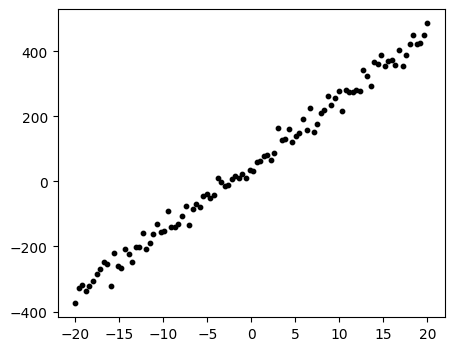

In [113]:
# Sample y = 20x + 50 with noise
x = np.linspace(-20, 20, 100)
y = 20*x + 50 + np.random.normal(0, 20, size=len(x))

plt.figure(figsize=(5,4))
plt.scatter(x,y, color='black', s=10); plt.show()

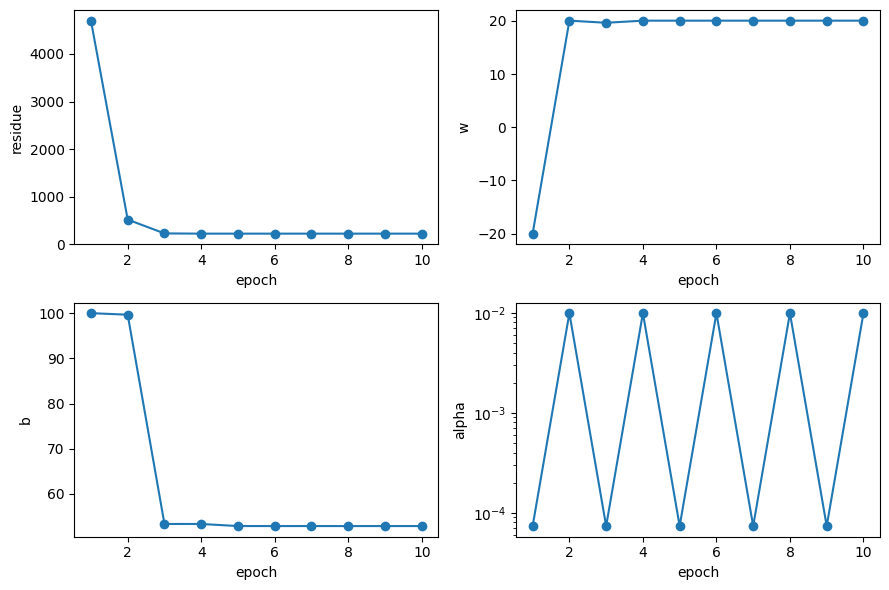

In [121]:
A = np.array([x, np.ones_like(x)]).T
d = y.T
# Initial guess of model m:
m0 = np.array([-20, 100])

# Batch Gradient Descent algorithm
# Setup
niters = 10
ws = np.zeros(niters)
bs = ws.copy()
ress = ws.copy()
alphas = ws.copy()

epochs = np.arange(niters) + 1

# For loop iterative algorithm
for e in epochs-1:
    res = np.linalg.norm(d - A @ m)
    ws[e], bs[e], ress[e] = m[0], m[1], res
    
    g = A.T @ (A @ m - d)
    alpha = np.linalg.norm(g)**2 / np.linalg.norm(A @ g)**2
    alphas[e] = alpha
    
    m = m - alpha * g

# Plot
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

axs[0,0].plot(epochs, ress, marker='o')
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('residue')
axs[0,0].set_ylim(bottom=0)

axs[0,1].plot(epochs, ws, marker='o')
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('w')

axs[1,0].plot(epochs, bs, marker='o')
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('b')

axs[1,1].plot(epochs, alphas, marker='o')
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('alpha')
axs[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

w,b: 20.04925026317072 52.88407282117578


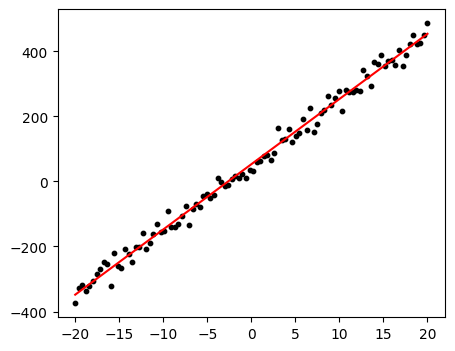

In [122]:
# Plot linear regression
plt.figure(figsize=(5,4))
plt.scatter(x,y, color='black', s=10)

X = np.linspace(-20, 20, 5000)
Y = ws[-1]*X + bs[-1]
print('w,b:', ws[-1], bs[-1])
plt.plot(X, Y, color='red')

plt.show()